<center>  
    <h1> Exploring Sentiments: <I>Elon Musk Tweets </I>
    <center>

In [1]:
!pip3 install snscrape

In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import warnings
warnings.filterwarnings('ignore')

## Importing tweets

Search for the last 1000 tweets related to Elon Musk in London

In [3]:
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('elonmusk near:"London"').get_items(),1000))[['date', 'content', 'user']]

In [4]:
df.head()

,date,content,user
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,"{'username': 'ScarletKnight_x', 'id': 13913788..."
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,"{'username': 'Allin_on_Tesla', 'id': 146603932..."
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,"{'username': 'CatherinScience', 'id': 14495121..."
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,"{'username': 'StratusVerse', 'id': 12592412497..."
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,"{'username': 'James_Hunt_1976', 'id': 10712622..."


## Data pre-processing

In [5]:
!pip3 install wordcloud

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import re

In [8]:
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x

In [9]:
df['text'] = df['content'].apply(clean)

In [10]:
df = df[['date', 'content', 'user', 'text']]

In [11]:
df.head()

,date,content,user,text
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,"{'username': 'ScarletKnight_x', 'id': 13913788...",WOOOW 🥳 I’m not gonna be anti social anymore
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,"{'username': 'Allin_on_Tesla', 'id': 146603932...",_Rojivadia Tell that to Modi.
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,"{'username': 'CatherinScience', 'id': 14495121...",I often write Tesla poetry. It not only help...
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,"{'username': 'StratusVerse', 'id': 12592412497...",Please can you hurry up with mine I’m curren...
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,"{'username': 'James_Hunt_1976', 'id': 10712622...",It doesn't look like that car was self-driv...


Convert to lower case

In [12]:
df['text_lower'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,date,content,user,text,text_lower
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,"{'username': 'ScarletKnight_x', 'id': 13913788...",WOOOW 🥳 I’m not gonna be anti social anymore,wooow 🥳 i’m not gonna be anti social anymore
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,"{'username': 'Allin_on_Tesla', 'id': 146603932...",_Rojivadia Tell that to Modi.,_rojivadia tell that to modi.
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,"{'username': 'CatherinScience', 'id': 14495121...",I often write Tesla poetry. It not only help...,i often write tesla poetry. it not only helps ...
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,"{'username': 'StratusVerse', 'id': 12592412497...",Please can you hurry up with mine I’m curren...,please can you hurry up with mine i’m currentl...
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,"{'username': 'James_Hunt_1976', 'id': 10712622...",It doesn't look like that car was self-driv...,it doesn't look like that car was self-driving:


Replace punctuation

In [13]:
df['text_punc'] = df['text_lower'].str.replace('[^\w\s]', '')
df['text_punc'].head()

0           wooow  im not gonna be anti social anymore
1                         _rojivadia tell that to modi
2    i often write tesla poetry it not only helps e...
3    please can you hurry up with mine im currently...
4         it doesnt look like that car was selfdriving
Name: text_punc, dtype: object

Stopwords

In [14]:
import unicodedata
import nltk
from nltk.corpus import stopwords

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
stopwords = nltk.corpus.stopwords.words('english') 

In [18]:
df['text_punc_words'] = df['text_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [19]:
df['text_punc_words'].head()

0                   wooow im gonna anti social anymore
1                                 _rojivadia tell modi
2    often write tesla poetry helps earth amazing p...
3    please hurry mine im currently bus wanker uk c...
4                     doesnt look like car selfdriving
Name: text_punc_words, dtype: object

### Stemming and Lemitization

<b>Stemming</b> is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

<b>Lemmatization</b>, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [20]:
from nltk.stem import PorterStemmer
st = PorterStemmer()


In [21]:
!pip3 install textblob

In [22]:
import textblob
from textblob import TextBlob, Word, Blobber

In [23]:
df['text_stem'] = df['text_punc_words'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Lemmatization to bring the words in their root form

In [24]:
import nltk
nltk.download('omw-1.4')
df['text_lem'] = df['text_stem'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text_lem'].head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                    wooow im gonna anti social anymor
1                                 _rojivadia tell modi
2    often write tesla poetri help earth amaz piec ...
3    plea hurri mine im current bu wanker uk curren...
4                        doesnt look like car selfdriv
Name: text_lem, dtype: object

## Polarity & Subjectivity

### Polarity

Polarity refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.

In [25]:
df['polarity'] = df['text_lem'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,date,content,user,text,text_lower,text_punc,text_punc_words,text_stem,text_lem,polarity
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,"{'username': 'ScarletKnight_x', 'id': 13913788...",WOOOW 🥳 I’m not gonna be anti social anymore,wooow 🥳 i’m not gonna be anti social anymore,wooow im not gonna be anti social anymore,wooow im gonna anti social anymore,wooow im gonna anti social anymor,wooow im gonna anti social anymor,0.033333
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,"{'username': 'Allin_on_Tesla', 'id': 146603932...",_Rojivadia Tell that to Modi.,_rojivadia tell that to modi.,_rojivadia tell that to modi,_rojivadia tell modi,_rojivadia tell modi,_rojivadia tell modi,0.000000
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,"{'username': 'CatherinScience', 'id': 14495121...",I often write Tesla poetry. It not only help...,i often write tesla poetry. it not only helps ...,i often write tesla poetry it not only helps e...,often write tesla poetry helps earth amazing p...,often write tesla poetri help earth amaz piec ...,often write tesla poetri help earth amaz piec ...,0.000000
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,"{'username': 'StratusVerse', 'id': 12592412497...",Please can you hurry up with mine I’m curren...,please can you hurry up with mine i’m currentl...,please can you hurry up with mine im currently...,please hurry mine im currently bus wanker uk c...,pleas hurri mine im current bu wanker uk curre...,plea hurri mine im current bu wanker uk curren...,0.000000
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,"{'username': 'James_Hunt_1976', 'id': 10712622...",It doesn't look like that car was self-driv...,it doesn't look like that car was self-driving:,it doesnt look like that car was selfdriving,doesnt look like car selfdriving,doesnt look like car selfdriv,doesnt look like car selfdriv,0.000000


### Subjectivity

Subjectivity refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

In [26]:
df['subjectivity'] = df['text_lem'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [27]:
df.head()

,date,content,user,text,text_lower,text_punc,text_punc_words,text_stem,text_lem,polarity,subjectivity
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,"{'username': 'ScarletKnight_x', 'id': 13913788...",WOOOW 🥳 I’m not gonna be anti social anymore,wooow 🥳 i’m not gonna be anti social anymore,wooow im not gonna be anti social anymore,wooow im gonna anti social anymore,wooow im gonna anti social anymor,wooow im gonna anti social anymor,0.033333,0.066667
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,"{'username': 'Allin_on_Tesla', 'id': 146603932...",_Rojivadia Tell that to Modi.,_rojivadia tell that to modi.,_rojivadia tell that to modi,_rojivadia tell modi,_rojivadia tell modi,_rojivadia tell modi,0.000000,0.000000
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,"{'username': 'CatherinScience', 'id': 14495121...",I often write Tesla poetry. It not only help...,i often write tesla poetry. it not only helps ...,i often write tesla poetry it not only helps e...,often write tesla poetry helps earth amazing p...,often write tesla poetri help earth amaz piec ...,often write tesla poetri help earth amaz piec ...,0.000000,0.000000
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,"{'username': 'StratusVerse', 'id': 12592412497...",Please can you hurry up with mine I’m curren...,please can you hurry up with mine i’m currentl...,please can you hurry up with mine im currently...,please hurry mine im currently bus wanker uk c...,pleas hurri mine im current bu wanker uk curre...,plea hurri mine im current bu wanker uk curren...,0.000000,0.400000
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,"{'username': 'James_Hunt_1976', 'id': 10712622...",It doesn't look like that car was self-driv...,it doesn't look like that car was self-driving:,it doesnt look like that car was selfdriving,doesnt look like car selfdriving,doesnt look like car selfdriv,doesnt look like car selfdriv,0.000000,0.000000


In [28]:
dfpol=df[['date','content','text_lem','polarity']]

In [29]:
dfpol.head()

,date,content,text_lem,polarity
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,wooow im gonna anti social anymor,0.033333
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,_rojivadia tell modi,0.000000
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,often write tesla poetri help earth amaz piec ...,0.000000
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,plea hurri mine im current bu wanker uk curren...,0.000000
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,doesnt look like car selfdriv,0.000000


In [30]:
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'
dfpol['class']= dfpol.polarity.apply(polarity_to_label)

In [31]:
dfpol.head()

,date,content,text_lem,polarity,class
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,wooow im gonna anti social anymor,0.033333,pos
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,_rojivadia tell modi,0.000000,neutral
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,often write tesla poetri help earth amaz piec ...,0.000000,neutral
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,plea hurri mine im current bu wanker uk curren...,0.000000,neutral
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,doesnt look like car selfdriv,0.000000,neutral


In [32]:
import datetime as dt

In [33]:
from datetime import date

dfpol['date'] = pd.to_datetime(dfpol['date']) #convert to the standard date formast
dfpol['new_date_column'] = dfpol['date'].dt.date

In [34]:
dfpol.head()

,date,content,text_lem,polarity,class,new_date_column
0,2022-08-16 18:53:19+00:00,@Tesla @elonmusk WOOOW 🥳 I’m not gonna be anti...,wooow im gonna anti social anymor,0.033333,pos,2022-08-16
1,2022-08-16 18:52:14+00:00,@Harsh_Rojivadia @Tesla @elonmusk Tell that to...,_rojivadia tell modi,0.000000,neutral,2022-08-16
2,2022-08-16 18:47:19+00:00,@Tesla @elonmusk I often write Tesla poetry. I...,often write tesla poetri help earth amaz piec ...,0.000000,neutral,2022-08-16
3,2022-08-16 18:45:18+00:00,@Tesla @elonmusk Please can you hurry up with ...,plea hurri mine im current bu wanker uk curren...,0.000000,neutral,2022-08-16
4,2022-08-16 18:37:34+00:00,@WholeMarsBlog @RealDanODowd @elonmusk It does...,doesnt look like car selfdriv,0.000000,neutral,2022-08-16


### Daily Polarity

In [35]:
dpol=dfpol.groupby(['new_date_column'],as_index=False)['polarity'].mean()

In [36]:
dpol.head()

,new_date_column,polarity
0,2022-08-12,0.061799
1,2022-08-13,0.027740
2,2022-08-14,0.048908
3,2022-08-15,0.041177
4,2022-08-16,0.062316


In [37]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os

from pprint import pprint
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

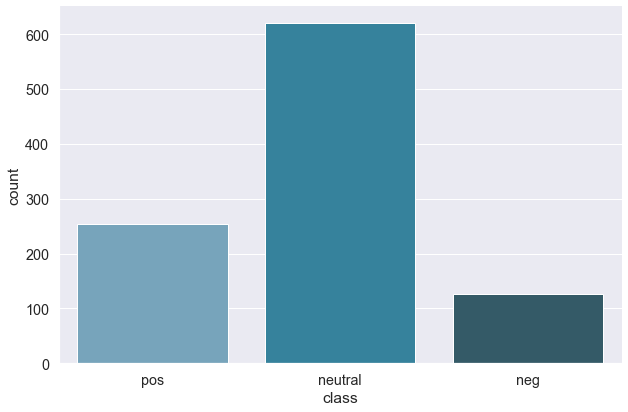

In [38]:
sns.factorplot(x="class", data=dfpol, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

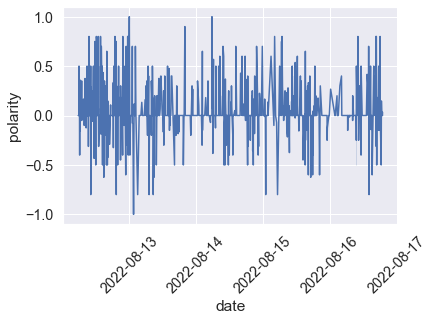

In [41]:
ax = sns.lineplot(data=dfpol, x="date", y="polarity")
ax.tick_params(axis='x', labelrotation=45)